In [12]:
%pip install -U -q pyod==1.1.3
%pip install -U -q prince==0.13.0
import pandas as pd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
df=pd.read_csv("RMIT 2024 Postgraduate Study Areas.csv", sep=",")
df.head()

,Course Name,Study area,Study type,Location,Entry Score,Prerequisites,Student type,Learning mode,Duration,Fees,Next intake,Course Page
0,Master of Architecture,Architecture,PG,Melbourne City,NaN,NaN,International,On campus,Full-time 2 years,48000.0,"Februray, July",https://www.rmit.edu.au/study-with-us/levels-o...
1,Master of Interior Design,Architecture,PG,Melbourne City,NaN,NaN,International,On campus,Full-time 2 years,46080.0,"Februray, July",https://www.rmit.edu.au/study-with-us/levels-o...
2,Master of Landscape Architecture,Architecture,PG,Melbourne City,NaN,NaN,International,On campus,Full-time 2 years,46080.0,"Februray, July",https://www.rmit.edu.au/study-with-us/levels-o...
3,Master of Urban Design,Architecture,PG,Melbourne City,NaN,NaN,International,On campus,Full-time 2 years,48960.0,"Februray, July",https://www.rmit.edu.au/study-with-us/levels-o...
4,Master of Design (Aechitecture & Design),Architecture,Research,Melbourne City,NaN,NaN,International,On campus,Full-time 2 years,39360.0,Continuous,https://www.rmit.edu.au/study-with-us/levels-o...


In [14]:
df.drop(columns=['Entry Score', 'Prerequisites', 'Course Page'], inplace=True)

In [15]:
df.head()

,Course Name,Study area,Study type,Location,Student type,Learning mode,Duration,Fees,Next intake
0,Master of Architecture,Architecture,PG,Melbourne City,International,On campus,Full-time 2 years,48000.0,"Februray, July"
1,Master of Interior Design,Architecture,PG,Melbourne City,International,On campus,Full-time 2 years,46080.0,"Februray, July"
2,Master of Landscape Architecture,Architecture,PG,Melbourne City,International,On campus,Full-time 2 years,46080.0,"Februray, July"
3,Master of Urban Design,Architecture,PG,Melbourne City,International,On campus,Full-time 2 years,48960.0,"Februray, July"
4,Master of Design (Aechitecture & Design),Architecture,Research,Melbourne City,International,On campus,Full-time 2 years,39360.0,Continuous


In [16]:
df.describe()

,Fees
count,40.000000
mean,36952.000000
std,10632.645231
min,4080.000000
25%,34560.000000
50%,39360.000000
75%,44160.000000
max,48960.000000


In [17]:
df_cleaned = df.copy()



# Export the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleanedPostGradStudyAreasCSV.csv', index=False)
df_cleaned.to_json('cleanedPostGradStudyAreasJson.json', orient='records')

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

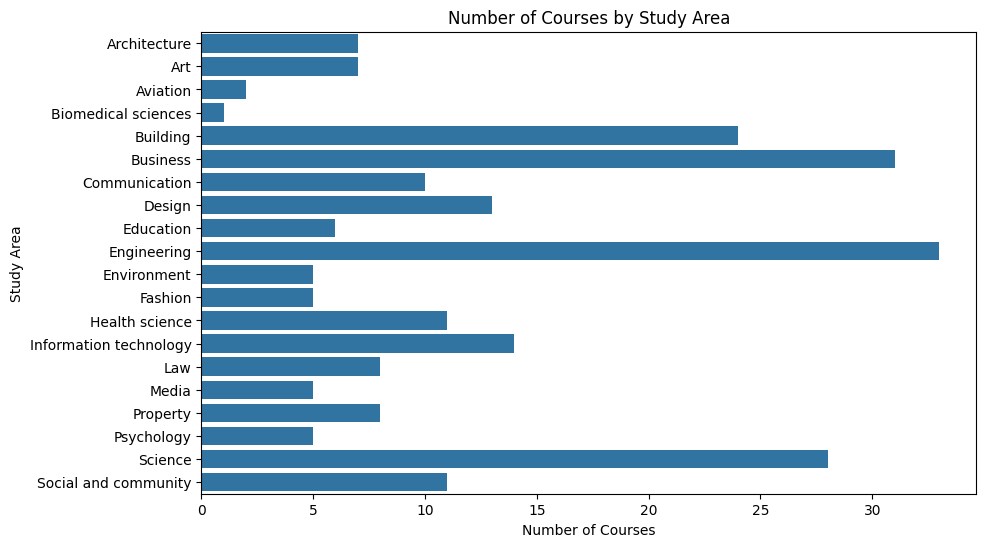

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Study area', data=df)
plt.title('Number of Courses by Study Area')
plt.xlabel('Number of Courses')
plt.ylabel('Study Area')
plt.show()

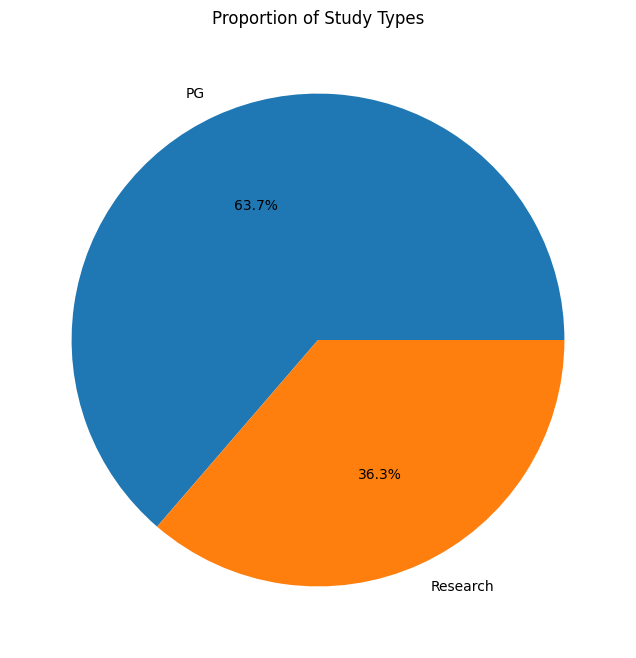

In [20]:
plt.figure(figsize=(8, 8))
df['Study type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Study Types')
plt.ylabel('')
plt.show()

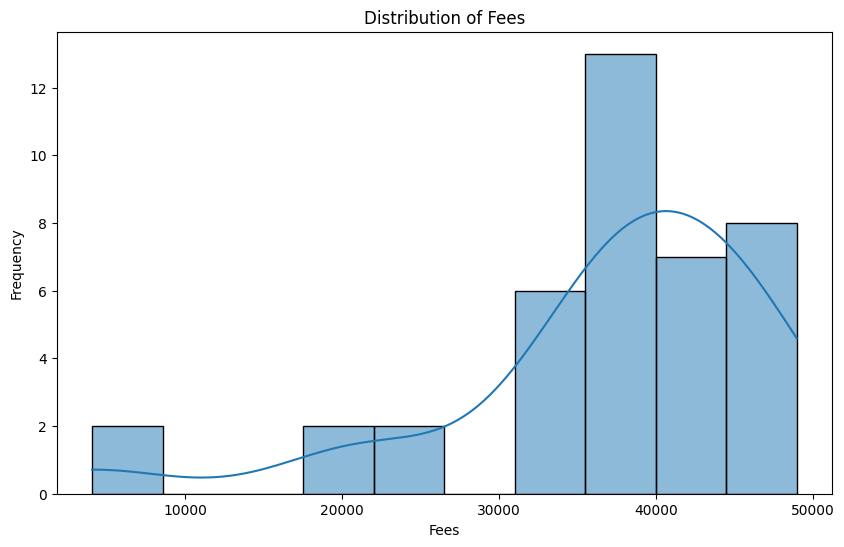

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fees'], bins=10, kde=True)
plt.title('Distribution of Fees')
plt.xlabel('Fees')
plt.ylabel('Frequency')
plt.show()

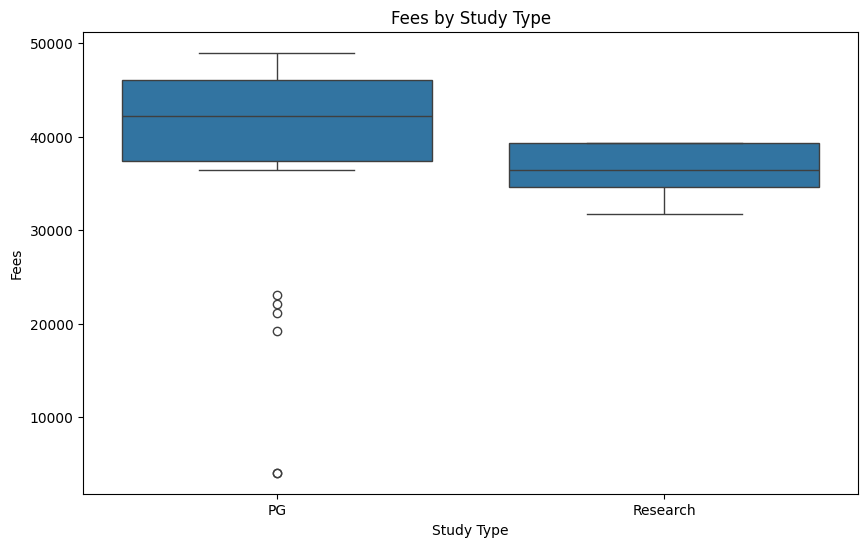

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Study type', y='Fees', data=df)
plt.title('Fees by Study Type')
plt.xlabel('Study Type')
plt.ylabel('Fees')
plt.show()

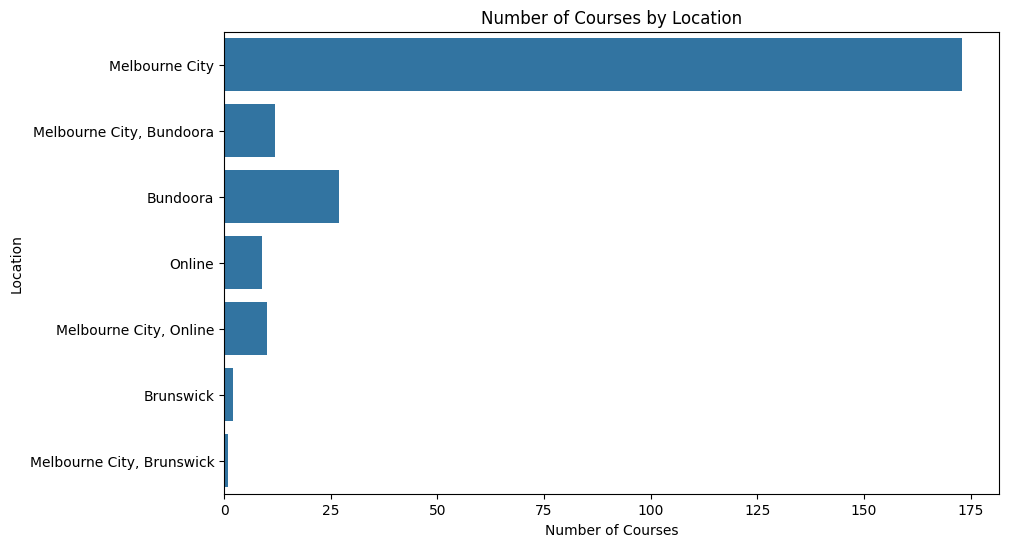

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Location', data=df)
plt.title('Number of Courses by Location')
plt.xlabel('Number of Courses')
plt.ylabel('Location')
plt.show()

                                           Course Name           Duration  \
0                               Master of Architecture  Full-time 2 years   
1                            Master of Interior Design  Full-time 2 years   
2                     Master of Landscape Architecture  Full-time 2 years   
3                               Master of Urban Design  Full-time 2 years   
4             Master of Design (Aechitecture & Design)  Full-time 2 years   
..                                                 ...                ...   
229           Master of Urban Planning and Environment                NaN   
230                     Master of Science (Psychology)                NaN   
231  Master of Social Science (Global, Urban & Soci...                NaN   
232               PhD (Global, Urban & Social Studies)                NaN   
233                                   PhD (Psychology)                NaN   

     Duration (years)  
0                 2.0  
1                 2.0  
2  

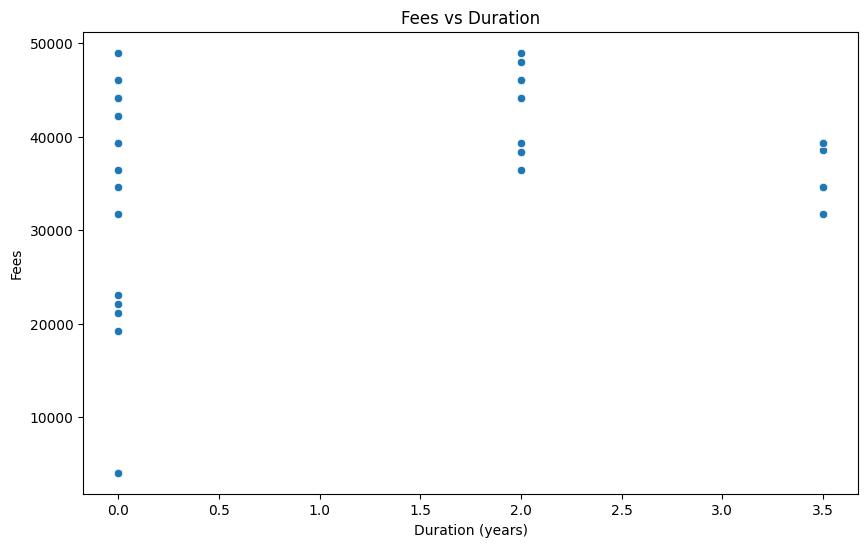

In [33]:
import re

def extract_duration(duration):
    if isinstance(duration, float):
        return 0
    if 'years' in duration:
        match = re.search(r'(\d+)(?:-(\d+))?', str(duration))
        if match:
            if match.group(2):
                return (int(match.group(1)) + int(match.group(2))) / 2
            else:
                return int(match.group(1))
    return 0

# Create a new DataFrame with the extracted 'Duration (years)' column
df_with_duration_years = df.copy()
df_with_duration_years['Duration (years)'] = df_with_duration_years['Duration'].apply(extract_duration)

# Check the new DataFrame
print(df_with_duration_years[['Course Name', 'Duration', 'Duration (years)']])

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (years)', y='Fees', data=df_with_duration_years)
plt.title('Fees vs Duration')
plt.xlabel('Duration (years)')
plt.ylabel('Fees')
plt.show()


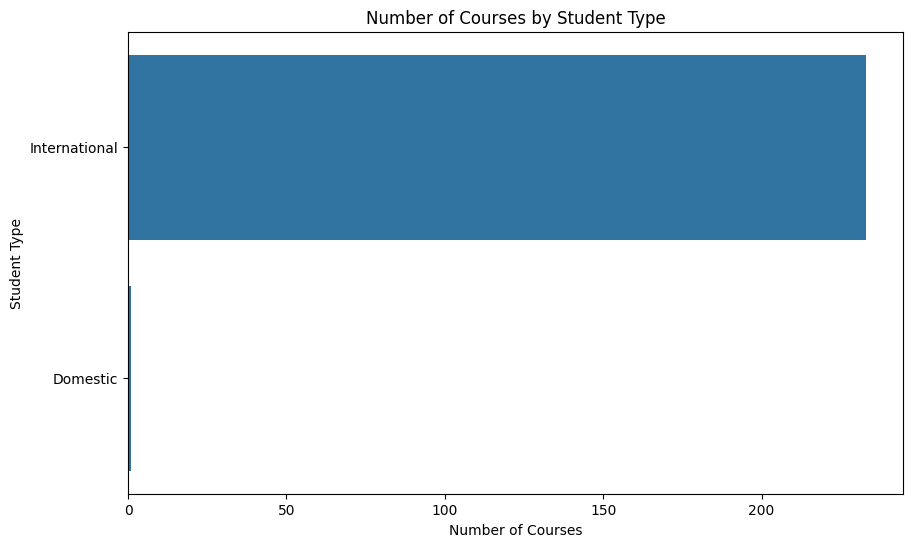

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Student type', data=df)
plt.title('Number of Courses by Student Type')
plt.xlabel('Number of Courses')
plt.ylabel('Student Type')
plt.show()

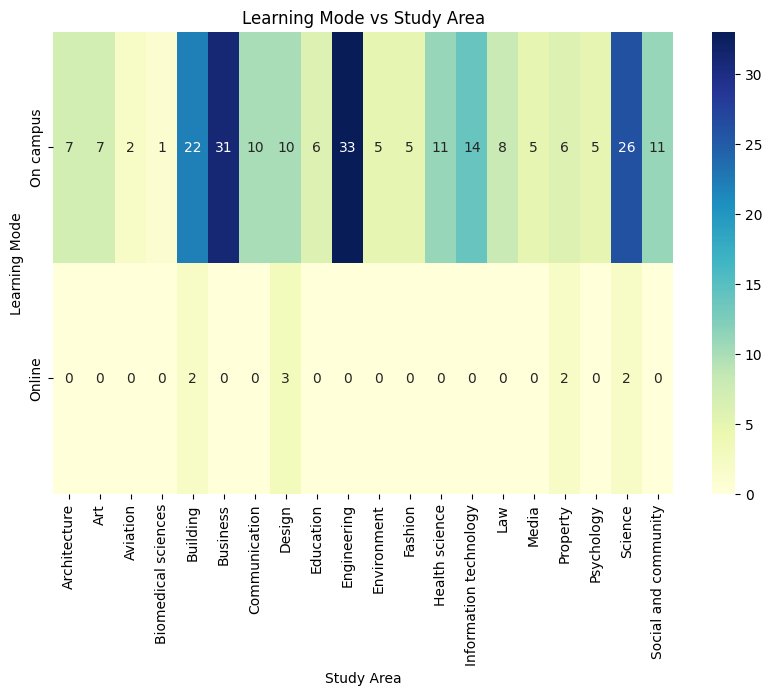

In [26]:
heatmap_data = df.groupby(['Learning mode', 'Study area']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Learning Mode vs Study Area')
plt.xlabel('Study Area')
plt.ylabel('Learning Mode')
plt.show()

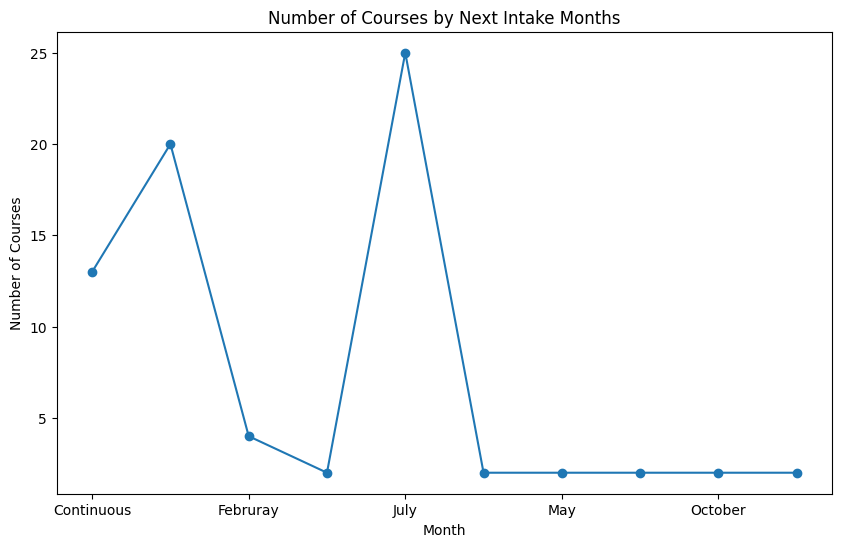

In [27]:
intake_months = df['Next intake'].str.get_dummies(sep=', ')
intake_counts = intake_months.sum().sort_index()

plt.figure(figsize=(10, 6))
intake_counts.plot(kind='line', marker='o')
plt.title('Number of Courses by Next Intake Months')
plt.xlabel('Month')
plt.ylabel('Number of Courses')
plt.show()

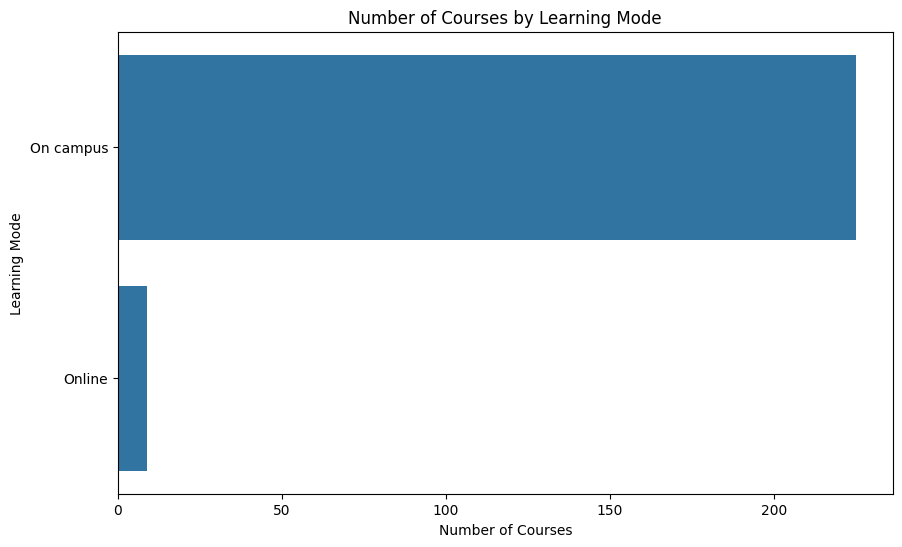

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Learning mode', data=df)
plt.title('Number of Courses by Learning Mode')
plt.xlabel('Number of Courses')
plt.ylabel('Learning Mode')
plt.show()

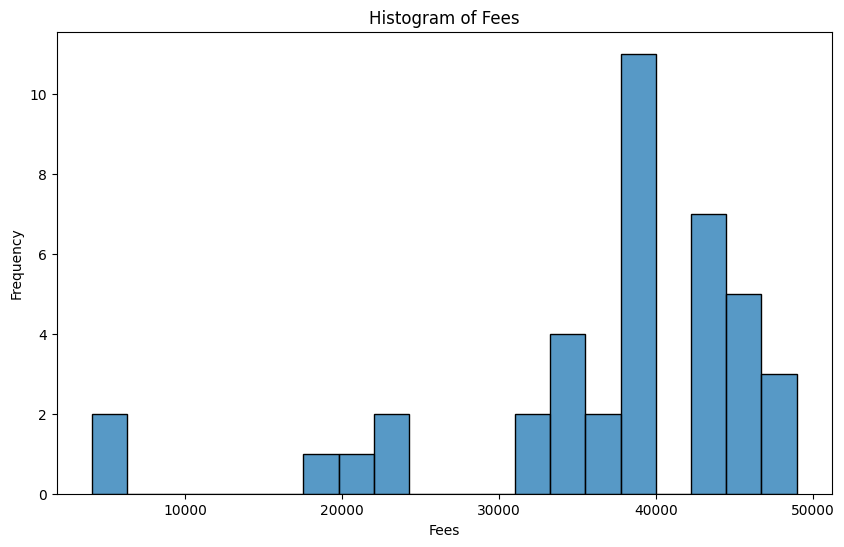

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_with_duration_years, x='Fees', bins=20)
plt.title('Histogram of Fees')
plt.xlabel('Fees')
plt.ylabel('Frequency')
plt.show()


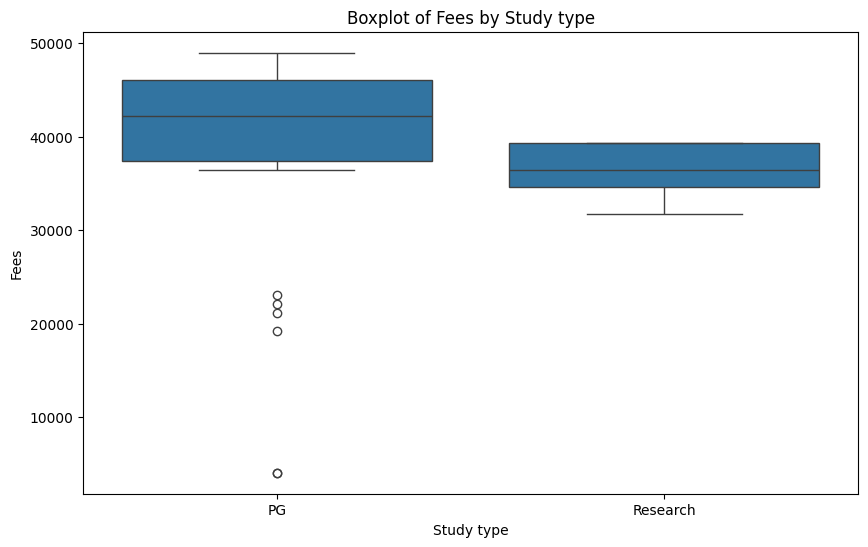

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_with_duration_years, x='Study type', y='Fees')
plt.title('Boxplot of Fees by Study type')
plt.xlabel('Study type')
plt.ylabel('Fees')
plt.show()


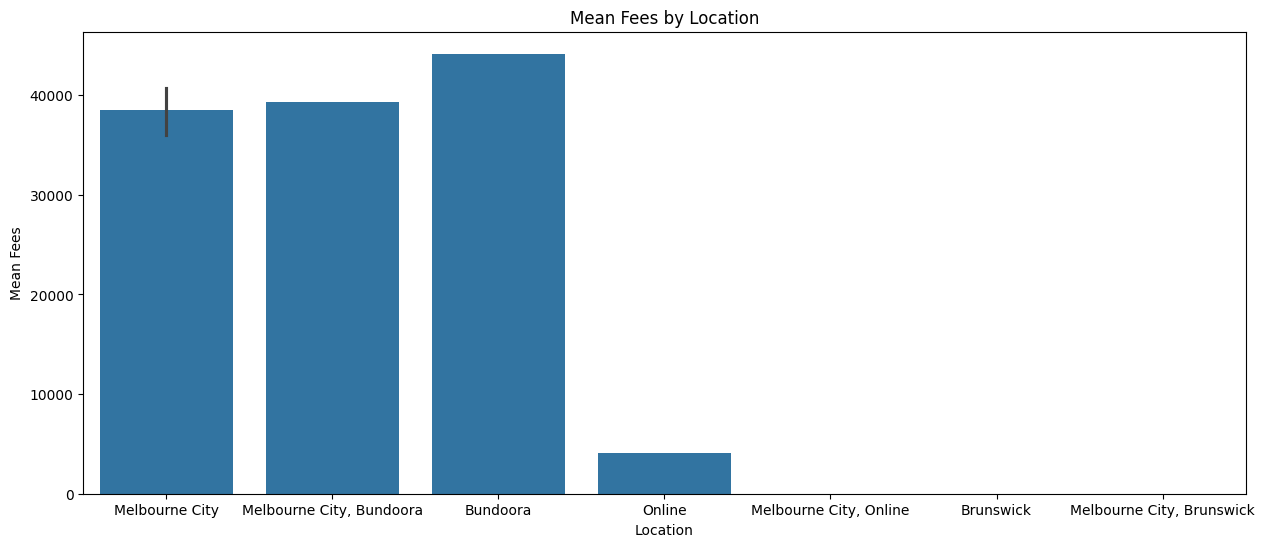

In [50]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df_with_duration_years, x='Location', y='Fees', estimator=lambda x: sum(x) / len(x))
plt.title('Mean Fees by Location')
plt.xlabel('Location')
plt.ylabel('Mean Fees')
plt.show()


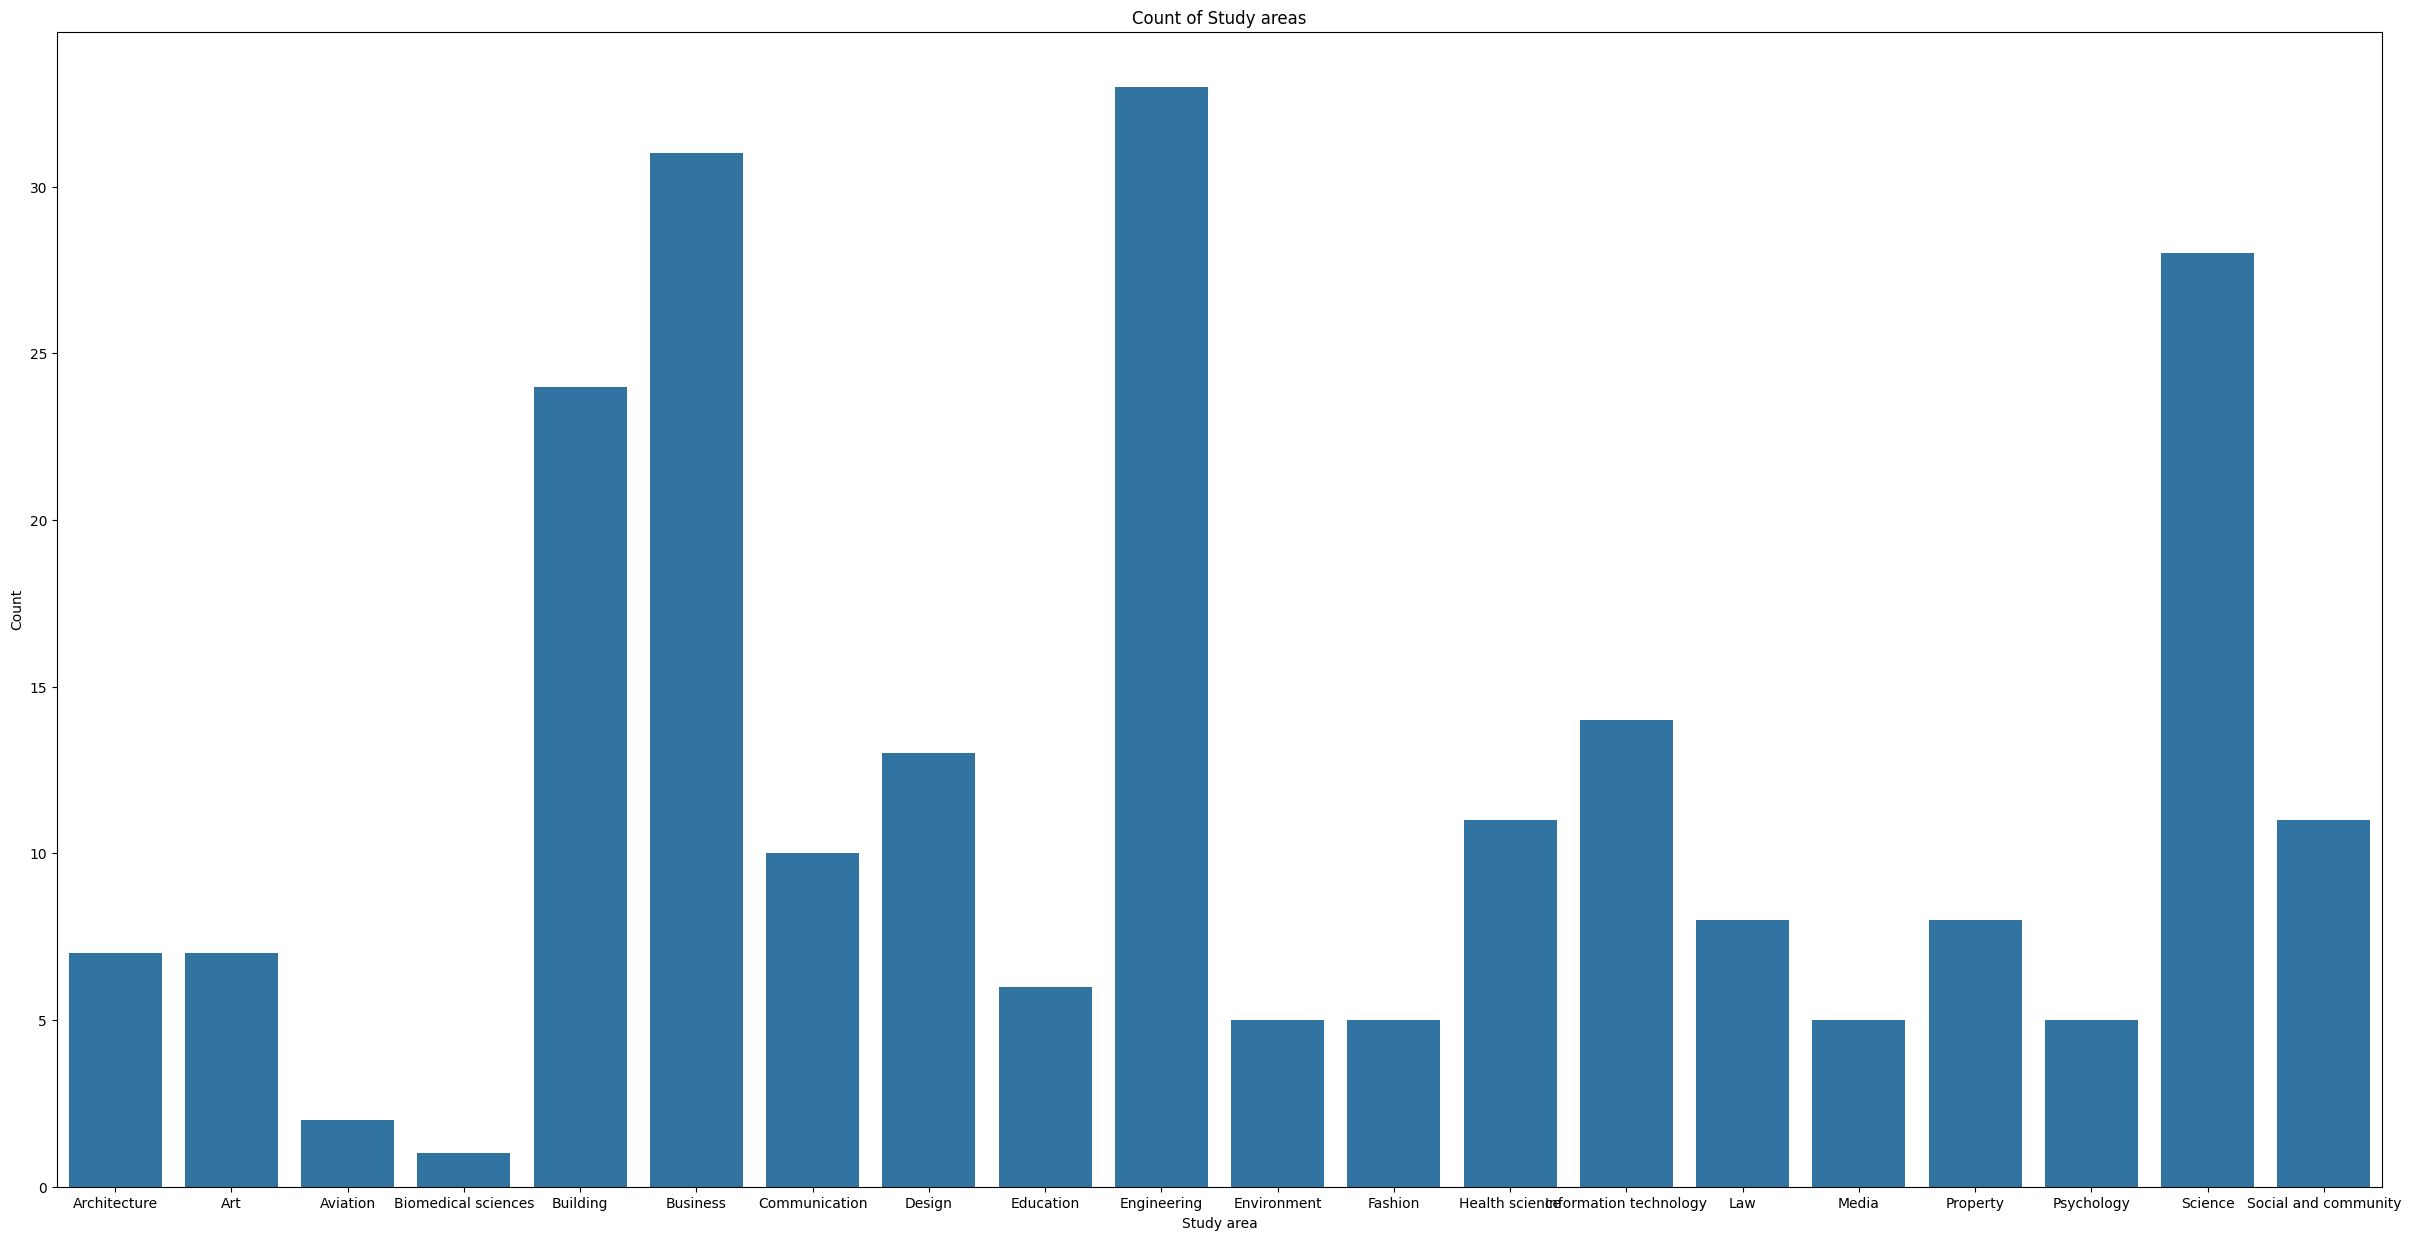

In [49]:
plt.figure(figsize=(30, 15))
sns.countplot(data=df_with_duration_years, x='Study area')
plt.title('Count of Study areas')
plt.xlabel('Study area')
plt.ylabel('Count')
plt.show()


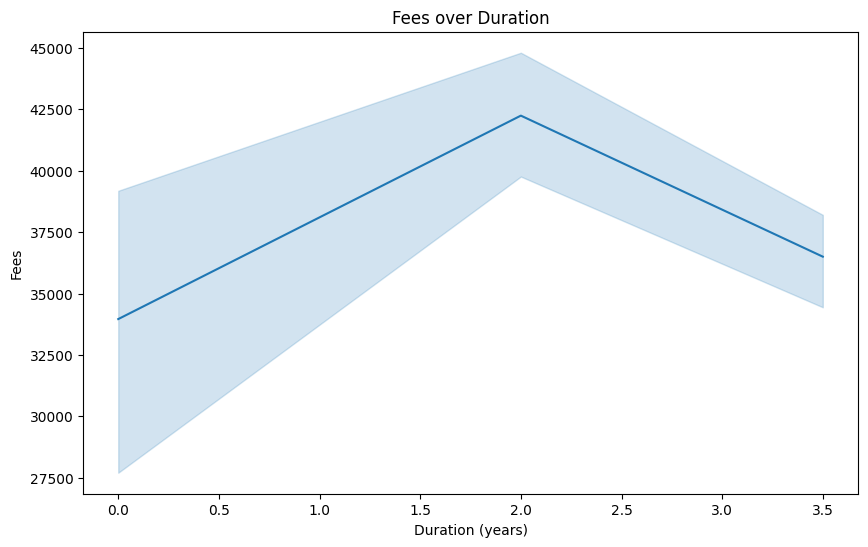

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_with_duration_years, x='Duration (years)', y='Fees')
plt.title('Fees over Duration')
plt.xlabel('Duration (years)')
plt.ylabel('Fees')
plt.show()


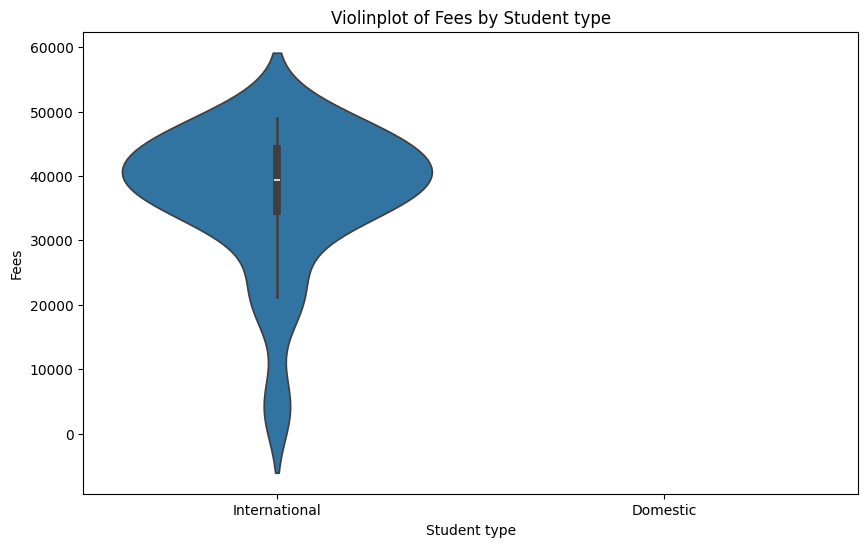

In [39]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_with_duration_years, x='Student type', y='Fees')
plt.title('Violinplot of Fees by Student type')
plt.xlabel('Student type')
plt.ylabel('Fees')
plt.show()


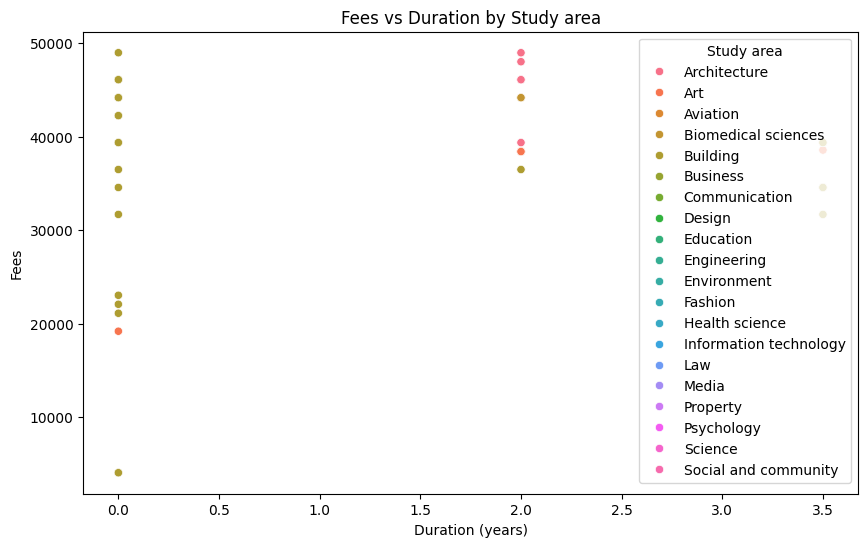

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_duration_years, x='Duration (years)', y='Fees', hue='Study area')
plt.title('Fees vs Duration by Study area')
plt.xlabel('Duration (years)')
plt.ylabel('Fees')
plt.show()


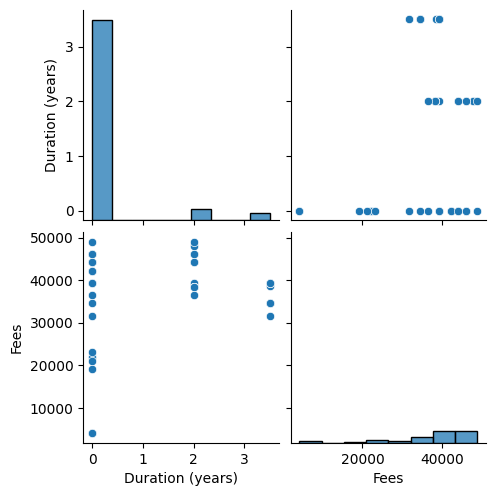

In [41]:
sns.pairplot(data=df_with_duration_years[['Duration (years)', 'Fees']])
plt.show()


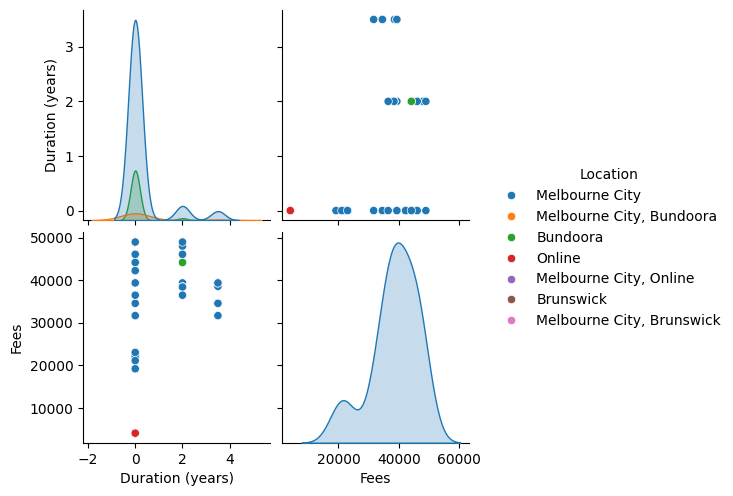

In [42]:
sns.pairplot(data=df_with_duration_years[['Duration (years)', 'Fees', 'Location']], hue='Location')
plt.show()


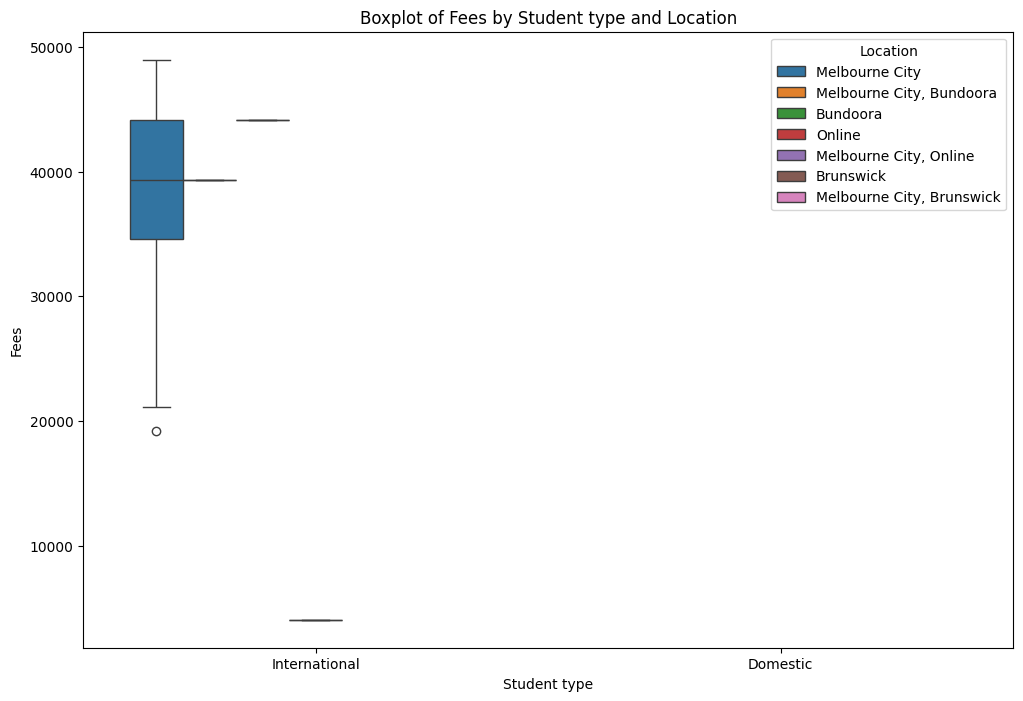

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_with_duration_years, x='Student type', y='Fees', hue='Location')
plt.title('Boxplot of Fees by Student type and Location')
plt.xlabel('Student type')
plt.ylabel('Fees')
plt.show()


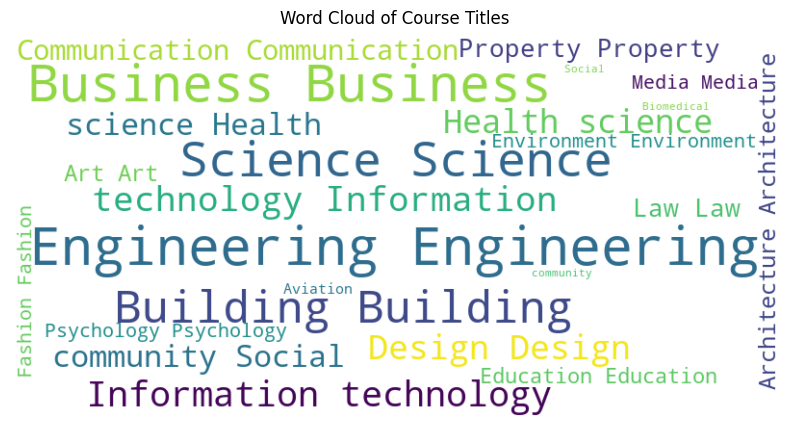

In [52]:
from wordcloud import WordCloud

# Word cloud for course titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Study area']))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Course Titles')
plt.show()

In [53]:
df.head()

,Course Name,Study area,Study type,Location,Student type,Learning mode,Duration,Fees,Next intake
0,Master of Architecture,Architecture,PG,Melbourne City,International,On campus,Full-time 2 years,48000.0,"Februray, July"
1,Master of Interior Design,Architecture,PG,Melbourne City,International,On campus,Full-time 2 years,46080.0,"Februray, July"
2,Master of Landscape Architecture,Architecture,PG,Melbourne City,International,On campus,Full-time 2 years,46080.0,"Februray, July"
3,Master of Urban Design,Architecture,PG,Melbourne City,International,On campus,Full-time 2 years,48960.0,"Februray, July"
4,Master of Design (Aechitecture & Design),Architecture,Research,Melbourne City,International,On campus,Full-time 2 years,39360.0,Continuous


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer

df = df.dropna()  

# Define the OneHotEncoder pipeline
onehot_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output= False))]
)

# Define the OrdinalEncoder pipeline
ordinal_transformer = Pipeline(
    steps=[("encoder", OrdinalEncoder())]
)

# Define the PowerTransformer pipeline
power_transformer = Pipeline(
    steps=[("encoder", PowerTransformer())]
)

# Define the ColumnTransformer to apply transformers to columns of the DataFrame
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot_transformer", onehot_transformer, ['Study area', 'Study type', 'Location', 'Student type', 'Learning mode']),
        ("ordinal_transformer", ordinal_transformer, ['Course Name']),  # Assuming 'Course Name' is categorical
        ("power_transformer", power_transformer, ['Fees'])  # Assuming 'Fees' needs power transformation
    ]
)


In [62]:
# creating a pipeline with the preprocessor step
pipeline=Pipeline(steps=[("preprocessor", preprocessor)])

#fitting the pipeline to the data
pipe_fit=pipeline.fit(df)

#transforming the data using the fitted pipeline
data=pd.DataFrame(
    pipe_fit.transform(df),
    columns=pipe_fit.get_feature_names_out().tolist()
)


#column names retrieved
data.columns.tolist()

['onehot_transformer__Study area_Art',
 'onehot_transformer__Study area_Aviation',
 'onehot_transformer__Study area_Biomedical sciences',
 'onehot_transformer__Study area_Building',
 'onehot_transformer__Study type_Research',
 'onehot_transformer__Location_Melbourne City',
 'onehot_transformer__Location_Melbourne City, Bundoora',
 'onehot_transformer__Location_Online',
 'onehot_transformer__Learning mode_Online',
 'ordinal_transformer__Course Name',
 'power_transformer__Fees']

In [63]:
data.head(10)

,onehot_transformer__Study area_Art,onehot_transformer__Study area_Aviation,onehot_transformer__Study area_Biomedical sciences,onehot_transformer__Study area_Building,onehot_transformer__Study type_Research,onehot_transformer__Location_Melbourne City,"onehot_transformer__Location_Melbourne City, Bundoora",onehot_transformer__Location_Online,onehot_transformer__Learning mode_Online,ordinal_transformer__Course Name,power_transformer__Fees
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.411429
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,1.089246
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,1.089246
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,1.578746
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,11.0,0.089990
5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,32.0,0.089990
6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,34.0,-0.504815
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.785278
8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,-0.036768
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,-0.036768


### Outliers

In [64]:
from pyod.models.ecod import ECOD

# Fit ECOD model to detect outliers
clf = ECOD()
outliers = clf.fit_predict(data)

# Add outlier predictions to the original data
data["outliers"] = outliers

# Separate data into two sets: one without outliers and one with outliers
data_no_outliers = data[data["outliers"] == 0].copy()
data_with_outliers = data.copy()

# Drop the "outliers" column from both sets
data_no_outliers.drop(["outliers"], axis=1, inplace=True)
data_with_outliers.drop(["outliers"], axis=1, inplace=True)

print("Data without outliers shape:", data_no_outliers.shape)
print("Data with outliers shape:", data_with_outliers.shape)


c:\Users\janak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Data without outliers shape: (36, 11)
Data with outliers shape: (40, 11)


In [65]:
df["outliers"] = outliers
# Original Data with Outliers
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)
print(df_no_outliers.shape)

(36, 9)


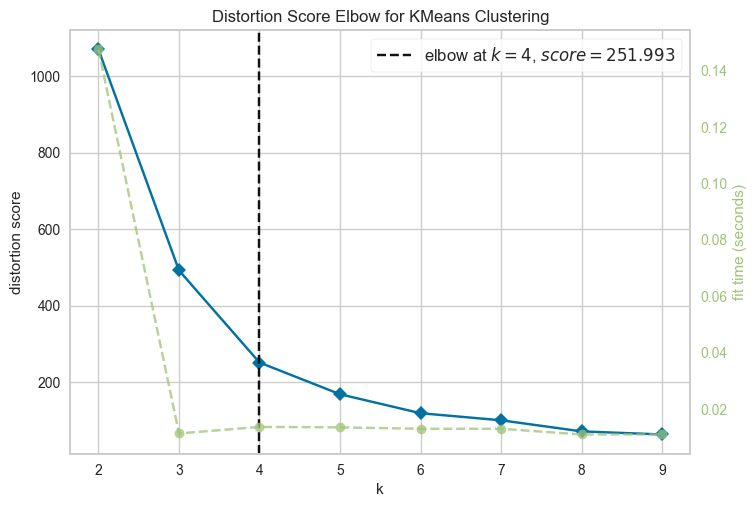

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
 
# Fit the data to the visualizer
visualizer.fit(data_no_outliers)

# Display the visualizer
visualizer.show()

### Optimization

In [67]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


#function to make silhouette plot
def make_Silhouette_plot(X, n_clusters):
    plt.figure(figsize=(10, 6))
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, n_init=10, init='k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        plt.title(f"The Silhouette Plot for n_cluster = {n_clusters}", fontsize=16)
        plt.xlabel("The silhouette coefficient values", fontsize=14)
        plt.ylabel("Cluster label", fontsize=14)
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


#evalutation
def evaluate_cluster(data, n_clusters):
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, n_init=10, init='k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    db_score = davies_bouldin_score(data, cluster_labels)
    return silhouette_avg, db_score

range_n_clusters = list(range(2, 10))
silhouette_scores = []
db_scores = []

for n_clusters in range_n_clusters:
    print(f"Evaluating cluster with n_clusters = {n_clusters}")
    silhouette_avg, db_score = evaluate_cluster(data_no_outliers, n_clusters)
    silhouette_scores.append(silhouette_avg)
    db_scores.append(db_score)
    make_Silhouette_plot(data_no_outliers, n_clusters)
    plt.savefig('Silhouette_plot_{}.png'.format(n_clusters))
    plt.close()

# Plot silhouette scores and Davies-Bouldin scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Score vs. Number of Clusters', fontsize=16)
plt.xticks(range_n_clusters)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Silhouette_scores.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, db_scores, marker='o', label='Davies-Bouldin Score')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Davies-Bouldin Score', fontsize=14)
plt.title('Davies-Bouldin Score vs. Number of Clusters', fontsize=16)
plt.xticks(range_n_clusters)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Davies_Bouldin_scores.png')
plt.close()

Evaluating cluster with n_clusters = 2
For n_clusters = 2 The average silhouette_score is : 0.5558998197941787
Evaluating cluster with n_clusters = 3
For n_clusters = 3 The average silhouette_score is : 0.5204785317672328
Evaluating cluster with n_clusters = 4
For n_clusters = 4 The average silhouette_score is : 0.5378096091941306
Evaluating cluster with n_clusters = 5
For n_clusters = 5 The average silhouette_score is : 0.5133715858879405
Evaluating cluster with n_clusters = 6
For n_clusters = 6 The average silhouette_score is : 0.4834820747582623
Evaluating cluster with n_clusters = 7
For n_clusters = 7 The average silhouette_score is : 0.4861726240345418
Evaluating cluster with n_clusters = 8
For n_clusters = 8 The average silhouette_score is : 0.45130690718133665
Evaluating cluster with n_clusters = 9
For n_clusters = 9 The average silhouette_score is : 0.40907197195157474


In [68]:
from sklearn.cluster import KMeans

# Instantiate KMeans with specified parameters
km = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=100, random_state=42)

# Fitting the model and predict cluster labels
clusters_predict = km.fit_predict(data_no_outliers)

# Printing or further process the cluster labels
print(clusters_predict)

[6 7 4 1 0 8 3 0 0 7 5 7 3 5 4 2 2 2 6 6 6 7 7 4 4 5 5 1 1 6 0 1 1 8 3 3]


In [69]:
np.unique(clusters_predict)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

### evaluation

In [70]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

#3 different scores generated
print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")

Davies bouldin score: 0.640145498967198
Calinski Score: 188.35143210469056
Silhouette Score: 0.40687357450714834


In [71]:
import prince
import plotly.express as px

def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()

    fig = px.scatter_3d(df, 
                        x=columns[0], 
                        y=columns[1], 
                        z=columns[2],
                        color='cluster',
                        template="plotly",
                        
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000, 
                                height = 800, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                      
    
    fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()


    fig = px.scatter(df, 
                        x=columns[0], 
                        y=columns[1],
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800, 
                                height = 700, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                        
        
    fig.show()
    
    
# PCA 3D

pca_3d_object, df_pca_3d = get_pca_3d(data_no_outliers, clusters_predict)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)


The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              2.180        27.25%                     27.25%
1              1.566        19.58%                     46.83%
2              1.486        18.58%                     65.41%


In [72]:
pca_2d_object, df_pca_2d = get_pca_2d(data_no_outliers, clusters_predict)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)